In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
tsr_test[10]

1.8

In [23]:
tsr_test[18]

1.6

In [24]:
theta_test[10]

360.0

In [25]:
theta_test[18]

0.0

In [26]:
os.chdir('C:\\Users\\User')

In [27]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [28]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [29]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [30]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [31]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [32]:
tsr_theta_train.shape

(394, 2, 1)

In [33]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0109 - rmse: 0.1040
Epoch 2/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1016
Epoch 3/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0910
Epoch 5/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0860
Epoch 6/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 7/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 8/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 497/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0489
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0488
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 503/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 660/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 661/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0385
Epoch 663/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 664/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 831/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 9.0193e-04 - rmse: 0.0286
Epoch 905/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0142e-04 - rmse: 0.0286
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9868e-04 - rmse: 0.0285
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9971e-04 - rmse: 0.0286
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9577e-04 - rmse: 0.0285
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9211e-04 - rmse: 0.0284
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9219e-04 - rmse: 0.0284
Epoch 911/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8493e-04 - rmse: 0.0283
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8313e-04 - rmse: 0.0283
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8969e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 7.7755e-04 - rmse: 0.0263
Epoch 984/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7620e-04 - rmse: 0.0263
Epoch 985/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7127e-04 - rmse: 0.0262
Epoch 986/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7257e-04 - rmse: 0.0262
Epoch 987/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7537e-04 - rmse: 0.0263
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8043e-04 - rmse: 0.0264
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7769e-04 - rmse: 0.0263
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7324e-04 - rmse: 0.0262
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6883e-04 - rmse: 0.0261
Epoch 992/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6994e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 6.8076e-04 - rmse: 0.0244
Epoch 1063/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8019e-04 - rmse: 0.0243
Epoch 1064/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7659e-04 - rmse: 0.0243
Epoch 1065/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7695e-04 - rmse: 0.0243
Epoch 1066/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7540e-04 - rmse: 0.0242
Epoch 1067/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7387e-04 - rmse: 0.0242
Epoch 1068/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7043e-04 - rmse: 0.0241
Epoch 1069/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6980e-04 - rmse: 0.0241
Epoch 1070/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6942e-04 - rmse: 0.0241
Epoch 1071/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.0390e-04 - rmse: 0.0227
Epoch 1141/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1049e-04 - rmse: 0.0228
Epoch 1142/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9790e-04 - rmse: 0.0226
Epoch 1143/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9989e-04 - rmse: 0.0226
Epoch 1144/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0004e-04 - rmse: 0.0226
Epoch 1145/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9471e-04 - rmse: 0.0225
Epoch 1146/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9197e-04 - rmse: 0.0224
Epoch 1147/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9357e-04 - rmse: 0.0225
Epoch 1148/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8992e-04 - rmse: 0.0224
Epoch 1149/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.3214e-04 - rmse: 0.0210
Epoch 1219/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3464e-04 - rmse: 0.0211
Epoch 1220/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3560e-04 - rmse: 0.0211
Epoch 1221/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3370e-04 - rmse: 0.0211
Epoch 1222/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3071e-04 - rmse: 0.0210
Epoch 1223/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2926e-04 - rmse: 0.0210
Epoch 1224/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3395e-04 - rmse: 0.0211
Epoch 1225/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2425e-04 - rmse: 0.0208
Epoch 1226/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2219e-04 - rmse: 0.0208
Epoch 1227/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 4.8663e-04 - rmse: 0.0199
Epoch 1297/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7951e-04 - rmse: 0.0197
Epoch 1298/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7445e-04 - rmse: 0.0196
Epoch 1299/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7132e-04 - rmse: 0.0195
Epoch 1300/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7903e-04 - rmse: 0.0197
Epoch 1301/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8080e-04 - rmse: 0.0198
Epoch 1302/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8078e-04 - rmse: 0.0198
Epoch 1303/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7429e-04 - rmse: 0.0196
Epoch 1304/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7712e-04 - rmse: 0.0197
Epoch 1305/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.3452e-04 - rmse: 0.0185
Epoch 1375/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3022e-04 - rmse: 0.0184
Epoch 1376/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3016e-04 - rmse: 0.0184
Epoch 1377/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3266e-04 - rmse: 0.0185
Epoch 1378/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3517e-04 - rmse: 0.0185
Epoch 1379/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3371e-04 - rmse: 0.0185
Epoch 1380/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2705e-04 - rmse: 0.0183
Epoch 1381/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2609e-04 - rmse: 0.0183
Epoch 1382/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2779e-04 - rmse: 0.0183
Epoch 1383/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 3.8789e-04 - rmse: 0.0172
Epoch 1453/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8461e-04 - rmse: 0.0171
Epoch 1454/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8908e-04 - rmse: 0.0172
Epoch 1455/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8841e-04 - rmse: 0.0172
Epoch 1456/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8758e-04 - rmse: 0.0172
Epoch 1457/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9035e-04 - rmse: 0.0173
Epoch 1458/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8445e-04 - rmse: 0.0171
Epoch 1459/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8680e-04 - rmse: 0.0172
Epoch 1460/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8999e-04 - rmse: 0.0173
Epoch 1461/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.5941e-04 - rmse: 0.0163
Epoch 1531/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6040e-04 - rmse: 0.0164
Epoch 1532/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6160e-04 - rmse: 0.0164
Epoch 1533/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6351e-04 - rmse: 0.0165
Epoch 1534/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5587e-04 - rmse: 0.0162
Epoch 1535/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5594e-04 - rmse: 0.0162
Epoch 1536/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5743e-04 - rmse: 0.0163
Epoch 1537/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5419e-04 - rmse: 0.0162
Epoch 1538/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5680e-04 - rmse: 0.0163
Epoch 1539/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.2984e-04 - rmse: 0.0154
Epoch 1609/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2747e-04 - rmse: 0.0153
Epoch 1610/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2640e-04 - rmse: 0.0153
Epoch 1611/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3231e-04 - rmse: 0.0155
Epoch 1612/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3018e-04 - rmse: 0.0154
Epoch 1613/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3134e-04 - rmse: 0.0154
Epoch 1614/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3297e-04 - rmse: 0.0155
Epoch 1615/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3073e-04 - rmse: 0.0154
Epoch 1616/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4540e-04 - rmse: 0.0159
Epoch 1617/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.0840e-04 - rmse: 0.0147
Epoch 1687/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0898e-04 - rmse: 0.0147
Epoch 1688/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0841e-04 - rmse: 0.0147
Epoch 1689/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0481e-04 - rmse: 0.0146
Epoch 1690/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0023e-04 - rmse: 0.0144
Epoch 1691/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0344e-04 - rmse: 0.0145
Epoch 1692/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0313e-04 - rmse: 0.0145
Epoch 1693/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0379e-04 - rmse: 0.0145
Epoch 1694/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0343e-04 - rmse: 0.0145
Epoch 1695/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.8607e-04 - rmse: 0.0139
Epoch 1765/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8641e-04 - rmse: 0.0139
Epoch 1766/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8494e-04 - rmse: 0.0139
Epoch 1767/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8559e-04 - rmse: 0.0139
Epoch 1768/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8766e-04 - rmse: 0.0140
Epoch 1769/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9106e-04 - rmse: 0.0141
Epoch 1770/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8807e-04 - rmse: 0.0140
Epoch 1771/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8697e-04 - rmse: 0.0139
Epoch 1772/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8520e-04 - rmse: 0.0139
Epoch 1773/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.7348e-04 - rmse: 0.0134
Epoch 1843/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6882e-04 - rmse: 0.0133
Epoch 1844/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7064e-04 - rmse: 0.0133
Epoch 1845/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7004e-04 - rmse: 0.0133
Epoch 1846/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7047e-04 - rmse: 0.0133
Epoch 1847/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6923e-04 - rmse: 0.0133
Epoch 1848/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6659e-04 - rmse: 0.0132
Epoch 1849/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6590e-04 - rmse: 0.0132
Epoch 1850/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6928e-04 - rmse: 0.0133
Epoch 1851/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6163e-04 - rmse: 0.0130
Epoch 1921/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5867e-04 - rmse: 0.0129
Epoch 1922/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5597e-04 - rmse: 0.0128
Epoch 1923/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5500e-04 - rmse: 0.0127
Epoch 1924/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5537e-04 - rmse: 0.0128
Epoch 1925/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5446e-04 - rmse: 0.0127
Epoch 1926/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5411e-04 - rmse: 0.0127
Epoch 1927/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5437e-04 - rmse: 0.0127
Epoch 1928/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5725e-04 - rmse: 0.0128
Epoch 1929/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.4625e-04 - rmse: 0.0124
Epoch 1999/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5314e-04 - rmse: 0.0127
Epoch 2000/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4566e-04 - rmse: 0.0124
Epoch 2001/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4280e-04 - rmse: 0.0123
Epoch 2002/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4126e-04 - rmse: 0.0122
Epoch 2003/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4194e-04 - rmse: 0.0122
Epoch 2004/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4104e-04 - rmse: 0.0122
Epoch 2005/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4114e-04 - rmse: 0.0122
Epoch 2006/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4452e-04 - rmse: 0.0123
Epoch 2007/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.3924e-04 - rmse: 0.0121
Epoch 2077/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3333e-04 - rmse: 0.0119
Epoch 2078/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3445e-04 - rmse: 0.0119
Epoch 2079/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3145e-04 - rmse: 0.0118
Epoch 2080/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3221e-04 - rmse: 0.0118
Epoch 2081/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3440e-04 - rmse: 0.0119
Epoch 2082/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3545e-04 - rmse: 0.0120
Epoch 2083/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3479e-04 - rmse: 0.0119
Epoch 2084/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3431e-04 - rmse: 0.0119
Epoch 2085/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.2676e-04 - rmse: 0.0116
Epoch 2155/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2432e-04 - rmse: 0.0115
Epoch 2156/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2697e-04 - rmse: 0.0116
Epoch 2157/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3131e-04 - rmse: 0.0118
Epoch 2158/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2628e-04 - rmse: 0.0116
Epoch 2159/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2549e-04 - rmse: 0.0116
Epoch 2160/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2745e-04 - rmse: 0.0117
Epoch 2161/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2838e-04 - rmse: 0.0117
Epoch 2162/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2549e-04 - rmse: 0.0116
Epoch 2163/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1761e-04 - rmse: 0.0112
Epoch 2233/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1657e-04 - rmse: 0.0112
Epoch 2234/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1871e-04 - rmse: 0.0113
Epoch 2235/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1731e-04 - rmse: 0.0112
Epoch 2236/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1576e-04 - rmse: 0.0112
Epoch 2237/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1594e-04 - rmse: 0.0112
Epoch 2238/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1491e-04 - rmse: 0.0111
Epoch 2239/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1590e-04 - rmse: 0.0112
Epoch 2240/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2095e-04 - rmse: 0.0114
Epoch 2241/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.0921e-04 - rmse: 0.0109
Epoch 2311/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0869e-04 - rmse: 0.0109
Epoch 2312/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0812e-04 - rmse: 0.0108
Epoch 2313/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0738e-04 - rmse: 0.0108
Epoch 2314/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0532e-04 - rmse: 0.0107
Epoch 2315/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0637e-04 - rmse: 0.0108
Epoch 2316/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0839e-04 - rmse: 0.0109
Epoch 2317/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1056e-04 - rmse: 0.0110
Epoch 2318/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1225e-04 - rmse: 0.0110
Epoch 2319/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.0144e-04 - rmse: 0.0106
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0524e-04 - rmse: 0.0107
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0472e-04 - rmse: 0.0107
Epoch 2391/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0354e-04 - rmse: 0.0107
Epoch 2392/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0434e-04 - rmse: 0.0107
Epoch 2393/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0035e-04 - rmse: 0.0105
Epoch 2394/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9983e-04 - rmse: 0.0105
Epoch 2395/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0389e-04 - rmse: 0.0107
Epoch 2396/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0338e-04 - rmse: 0.0106
Epoch 2397/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.9828e-04 - rmse: 0.0104
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9548e-04 - rmse: 0.0103
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9636e-04 - rmse: 0.0103
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9703e-04 - rmse: 0.0104
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9661e-04 - rmse: 0.0104
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9890e-04 - rmse: 0.0105
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9611e-04 - rmse: 0.0103
Epoch 2473/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9433e-04 - rmse: 0.0102
Epoch 2474/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9402e-04 - rmse: 0.0102
Epoch 2475/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.9215e-04 - rmse: 0.0102
Epoch 2545/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9028e-04 - rmse: 0.0101
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9426e-04 - rmse: 0.0103
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9106e-04 - rmse: 0.0101
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9405e-04 - rmse: 0.0103
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9370e-04 - rmse: 0.0102
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9012e-04 - rmse: 0.0101
Epoch 2551/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9204e-04 - rmse: 0.0102
Epoch 2552/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9175e-04 - rmse: 0.0101
Epoch 2553/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8867e-04 - rmse: 0.0100
Epoch 2623/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8653e-04 - rmse: 0.0099
Epoch 2624/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8718e-04 - rmse: 0.0099
Epoch 2625/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8838e-04 - rmse: 0.0100
Epoch 2626/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8868e-04 - rmse: 0.0100
Epoch 2627/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8641e-04 - rmse: 0.0099
Epoch 2628/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8569e-04 - rmse: 0.0099
Epoch 2629/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8754e-04 - rmse: 0.0100
Epoch 2630/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8879e-04 - rmse: 0.0100
Epoch 2631/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.8823e-04 - rmse: 0.0100
Epoch 2701/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8420e-04 - rmse: 0.0098
Epoch 2702/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8514e-04 - rmse: 0.0099
Epoch 2703/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8724e-04 - rmse: 0.0100
Epoch 2704/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8449e-04 - rmse: 0.0098
Epoch 2705/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8384e-04 - rmse: 0.0098
Epoch 2706/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8543e-04 - rmse: 0.0099
Epoch 2707/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8553e-04 - rmse: 0.0099
Epoch 2708/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8340e-04 - rmse: 0.0098
Epoch 2709/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.7515e-04 - rmse: 0.0094
Epoch 2779/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7894e-04 - rmse: 0.0096
Epoch 2780/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7444e-04 - rmse: 0.0094
Epoch 2781/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7732e-04 - rmse: 0.0095
Epoch 2782/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7456e-04 - rmse: 0.0094
Epoch 2783/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7453e-04 - rmse: 0.0094
Epoch 2784/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7480e-04 - rmse: 0.0094
Epoch 2785/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7728e-04 - rmse: 0.0095
Epoch 2786/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7764e-04 - rmse: 0.0095
Epoch 2787/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.7281e-04 - rmse: 0.0093
Epoch 2857/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7408e-04 - rmse: 0.0094
Epoch 2858/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7320e-04 - rmse: 0.0093
Epoch 2859/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7189e-04 - rmse: 0.0092
Epoch 2860/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7605e-04 - rmse: 0.0095
Epoch 2861/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7401e-04 - rmse: 0.0094
Epoch 2862/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6978e-04 - rmse: 0.0091
Epoch 2863/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6941e-04 - rmse: 0.0091
Epoch 2864/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6823e-04 - rmse: 0.0090
Epoch 2865/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.7203e-04 - rmse: 0.0093
Epoch 2935/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6956e-04 - rmse: 0.0092
Epoch 2936/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6861e-04 - rmse: 0.0091
Epoch 2937/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6646e-04 - rmse: 0.0090
Epoch 2938/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6690e-04 - rmse: 0.0090
Epoch 2939/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6800e-04 - rmse: 0.0091
Epoch 2940/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7016e-04 - rmse: 0.0092
Epoch 2941/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6830e-04 - rmse: 0.0091
Epoch 2942/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7089e-04 - rmse: 0.0092
Epoch 2943/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6310e-04 - rmse: 0.0088
Epoch 3013/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6118e-04 - rmse: 0.0087
Epoch 3014/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6327e-04 - rmse: 0.0088
Epoch 3015/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6861e-04 - rmse: 0.0091
Epoch 3016/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6646e-04 - rmse: 0.0090
Epoch 3017/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6441e-04 - rmse: 0.0089
Epoch 3018/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6515e-04 - rmse: 0.0089
Epoch 3019/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6465e-04 - rmse: 0.0089
Epoch 3020/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6562e-04 - rmse: 0.0090
Epoch 3021/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6533e-04 - rmse: 0.0090
Epoch 3091/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6548e-04 - rmse: 0.0090
Epoch 3092/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6453e-04 - rmse: 0.0089
Epoch 3093/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6954e-04 - rmse: 0.0092
Epoch 3094/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6841e-04 - rmse: 0.0092
Epoch 3095/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6474e-04 - rmse: 0.0090
Epoch 3096/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6443e-04 - rmse: 0.0089
Epoch 3097/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6235e-04 - rmse: 0.0088
Epoch 3098/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6165e-04 - rmse: 0.0088
Epoch 3099/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.6430e-04 - rmse: 0.0090
Epoch 3169/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6194e-04 - rmse: 0.0088
Epoch 3170/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6197e-04 - rmse: 0.0088
Epoch 3171/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6151e-04 - rmse: 0.0088
Epoch 3172/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5955e-04 - rmse: 0.0087
Epoch 3173/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5962e-04 - rmse: 0.0087
Epoch 3174/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5660e-04 - rmse: 0.0085
Epoch 3175/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5705e-04 - rmse: 0.0086
Epoch 3176/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5937e-04 - rmse: 0.0087
Epoch 3177/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5447e-04 - rmse: 0.0084
Epoch 3247/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5281e-04 - rmse: 0.0083
Epoch 3248/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5322e-04 - rmse: 0.0084
Epoch 3249/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5462e-04 - rmse: 0.0084
Epoch 3250/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5474e-04 - rmse: 0.0085
Epoch 3251/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5895e-04 - rmse: 0.0087
Epoch 3252/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6121e-04 - rmse: 0.0088
Epoch 3253/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5649e-04 - rmse: 0.0086
Epoch 3254/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5347e-04 - rmse: 0.0084
Epoch 3255/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5632e-04 - rmse: 0.0086
Epoch 3325/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5713e-04 - rmse: 0.0086
Epoch 3326/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5606e-04 - rmse: 0.0086
Epoch 3327/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5680e-04 - rmse: 0.0086
Epoch 3328/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5667e-04 - rmse: 0.0086
Epoch 3329/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5655e-04 - rmse: 0.0086
Epoch 3330/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5607e-04 - rmse: 0.0086
Epoch 3331/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5319e-04 - rmse: 0.0084
Epoch 3332/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4985e-04 - rmse: 0.0082
Epoch 3333/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.5136e-04 - rmse: 0.0083
Epoch 3403/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5187e-04 - rmse: 0.0084
Epoch 3404/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4930e-04 - rmse: 0.0082
Epoch 3405/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5043e-04 - rmse: 0.0083
Epoch 3406/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5292e-04 - rmse: 0.0084
Epoch 3407/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5287e-04 - rmse: 0.0084
Epoch 3408/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5999e-04 - rmse: 0.0088
Epoch 3409/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5361e-04 - rmse: 0.0085
Epoch 3410/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5427e-04 - rmse: 0.0085
Epoch 3411/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5125e-04 - rmse: 0.0084
Epoch 3481/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4904e-04 - rmse: 0.0082
Epoch 3482/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4639e-04 - rmse: 0.0081
Epoch 3483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4408e-04 - rmse: 0.0079
Epoch 3484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4657e-04 - rmse: 0.0081
Epoch 3485/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5156e-04 - rmse: 0.0084
Epoch 3486/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5168e-04 - rmse: 0.0084
Epoch 3487/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5257e-04 - rmse: 0.0084
Epoch 3488/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4952e-04 - rmse: 0.0083
Epoch 3489/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4480e-04 - rmse: 0.0080
Epoch 3559/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4861e-04 - rmse: 0.0082
Epoch 3560/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4880e-04 - rmse: 0.0082
Epoch 3561/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4843e-04 - rmse: 0.0082
Epoch 3562/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4603e-04 - rmse: 0.0081
Epoch 3563/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4226e-04 - rmse: 0.0078
Epoch 3564/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4557e-04 - rmse: 0.0080
Epoch 3565/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4912e-04 - rmse: 0.0083
Epoch 3566/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4780e-04 - rmse: 0.0082
Epoch 3567/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.4512e-04 - rmse: 0.0080
Epoch 3637/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4657e-04 - rmse: 0.0081
Epoch 3638/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4213e-04 - rmse: 0.0079
Epoch 3639/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4465e-04 - rmse: 0.0080
Epoch 3640/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4561e-04 - rmse: 0.0081
Epoch 3641/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4545e-04 - rmse: 0.0081
Epoch 3642/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4454e-04 - rmse: 0.0080
Epoch 3643/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4631e-04 - rmse: 0.0081
Epoch 3644/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4580e-04 - rmse: 0.0081
Epoch 3645/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4542e-04 - rmse: 0.0081
Epoch 3715/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4225e-04 - rmse: 0.0079
Epoch 3716/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4109e-04 - rmse: 0.0078
Epoch 3717/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4195e-04 - rmse: 0.0079
Epoch 3718/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4019e-04 - rmse: 0.0078
Epoch 3719/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3891e-04 - rmse: 0.0077
Epoch 3720/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5060e-04 - rmse: 0.0084
Epoch 3721/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4685e-04 - rmse: 0.0082
Epoch 3722/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4850e-04 - rmse: 0.0083
Epoch 3723/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4187e-04 - rmse: 0.0079
Epoch 3793/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4059e-04 - rmse: 0.0078
Epoch 3794/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4075e-04 - rmse: 0.0078
Epoch 3795/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3970e-04 - rmse: 0.0078
Epoch 3796/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3997e-04 - rmse: 0.0078
Epoch 3797/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3899e-04 - rmse: 0.0077
Epoch 3798/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4152e-04 - rmse: 0.0079
Epoch 3799/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4120e-04 - rmse: 0.0079
Epoch 3800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4359e-04 - rmse: 0.0080
Epoch 3801/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4337e-04 - rmse: 0.0080
Epoch 3871/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4013e-04 - rmse: 0.0078
Epoch 3872/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4166e-04 - rmse: 0.0079
Epoch 3873/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3617e-04 - rmse: 0.0076
Epoch 3874/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3644e-04 - rmse: 0.0076
Epoch 3875/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3622e-04 - rmse: 0.0076
Epoch 3876/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3627e-04 - rmse: 0.0076
Epoch 3877/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3683e-04 - rmse: 0.0076
Epoch 3878/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3676e-04 - rmse: 0.0076
Epoch 3879/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3500e-04 - rmse: 0.0075
Epoch 3949/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3579e-04 - rmse: 0.0076
Epoch 3950/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3343e-04 - rmse: 0.0074
Epoch 3951/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3178e-04 - rmse: 0.0073
Epoch 3952/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3383e-04 - rmse: 0.0075
Epoch 3953/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3757e-04 - rmse: 0.0077
Epoch 3954/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3778e-04 - rmse: 0.0077
Epoch 3955/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3719e-04 - rmse: 0.0077
Epoch 3956/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3475e-04 - rmse: 0.0075
Epoch 3957/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3439e-04 - rmse: 0.0075
Epoch 4027/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3236e-04 - rmse: 0.0074
Epoch 4028/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3284e-04 - rmse: 0.0074
Epoch 4029/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3319e-04 - rmse: 0.0075
Epoch 4030/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3223e-04 - rmse: 0.0074
Epoch 4031/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3898e-04 - rmse: 0.0078
Epoch 4032/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3687e-04 - rmse: 0.0077
Epoch 4033/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3593e-04 - rmse: 0.0076
Epoch 4034/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3536e-04 - rmse: 0.0076
Epoch 4035/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3118e-04 - rmse: 0.0074
Epoch 4105/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3124e-04 - rmse: 0.0074
Epoch 4106/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2915e-04 - rmse: 0.0072
Epoch 4107/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2916e-04 - rmse: 0.0072
Epoch 4108/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2953e-04 - rmse: 0.0073
Epoch 4109/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2816e-04 - rmse: 0.0072
Epoch 4110/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3126e-04 - rmse: 0.0074
Epoch 4111/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2909e-04 - rmse: 0.0072
Epoch 4112/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3003e-04 - rmse: 0.0073
Epoch 4113/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3761e-04 - rmse: 0.0078
Epoch 4183/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3323e-04 - rmse: 0.0075
Epoch 4184/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2902e-04 - rmse: 0.0073
Epoch 4185/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2990e-04 - rmse: 0.0073
Epoch 4186/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3494e-04 - rmse: 0.0076
Epoch 4187/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3326e-04 - rmse: 0.0075
Epoch 4188/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3249e-04 - rmse: 0.0075
Epoch 4189/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3169e-04 - rmse: 0.0074
Epoch 4190/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3116e-04 - rmse: 0.0074
Epoch 4191/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.3010e-04 - rmse: 0.0074
Epoch 4261/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3015e-04 - rmse: 0.0074
Epoch 4262/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2896e-04 - rmse: 0.0073
Epoch 4263/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2775e-04 - rmse: 0.0072
Epoch 4264/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2404e-04 - rmse: 0.0069
Epoch 4265/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2976e-04 - rmse: 0.0073
Epoch 4266/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2885e-04 - rmse: 0.0073
Epoch 4267/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2715e-04 - rmse: 0.0072
Epoch 4268/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2860e-04 - rmse: 0.0073
Epoch 4269/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2835e-04 - rmse: 0.0073
Epoch 4339/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2617e-04 - rmse: 0.0071
Epoch 4340/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2694e-04 - rmse: 0.0072
Epoch 4341/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2572e-04 - rmse: 0.0071
Epoch 4342/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2511e-04 - rmse: 0.0070
Epoch 4343/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2639e-04 - rmse: 0.0071
Epoch 4344/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2510e-04 - rmse: 0.0070
Epoch 4345/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2657e-04 - rmse: 0.0072
Epoch 4346/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2742e-04 - rmse: 0.0072
Epoch 4347/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2623e-04 - rmse: 0.0072
Epoch 4417/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2768e-04 - rmse: 0.0073
Epoch 4418/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3022e-04 - rmse: 0.0074
Epoch 4419/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2645e-04 - rmse: 0.0072
Epoch 4420/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2344e-04 - rmse: 0.0070
Epoch 4421/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2356e-04 - rmse: 0.0070
Epoch 4422/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2535e-04 - rmse: 0.0071
Epoch 4423/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2305e-04 - rmse: 0.0069
Epoch 4424/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2269e-04 - rmse: 0.0069
Epoch 4425/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2807e-04 - rmse: 0.0073
Epoch 4495/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2750e-04 - rmse: 0.0073
Epoch 4496/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2362e-04 - rmse: 0.0070
Epoch 4497/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2206e-04 - rmse: 0.0069
Epoch 4498/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2175e-04 - rmse: 0.0069
Epoch 4499/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2465e-04 - rmse: 0.0071
Epoch 4500/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2496e-04 - rmse: 0.0071
Epoch 4501/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2624e-04 - rmse: 0.0072
Epoch 4502/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2423e-04 - rmse: 0.0071
Epoch 4503/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2667e-04 - rmse: 0.0073
Epoch 4573/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2395e-04 - rmse: 0.0071
Epoch 4574/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2089e-04 - rmse: 0.0069
Epoch 4575/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2233e-04 - rmse: 0.0070
Epoch 4576/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2036e-04 - rmse: 0.0068
Epoch 4577/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1984e-04 - rmse: 0.0068
Epoch 4578/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1763e-04 - rmse: 0.0066
Epoch 4579/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1966e-04 - rmse: 0.0068
Epoch 4580/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2298e-04 - rmse: 0.0070
Epoch 4581/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2134e-04 - rmse: 0.0069
Epoch 4651/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2082e-04 - rmse: 0.0069
Epoch 4652/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2097e-04 - rmse: 0.0069
Epoch 4653/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2316e-04 - rmse: 0.0071
Epoch 4654/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2091e-04 - rmse: 0.0069
Epoch 4655/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1844e-04 - rmse: 0.0067
Epoch 4656/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1640e-04 - rmse: 0.0066
Epoch 4657/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1695e-04 - rmse: 0.0066
Epoch 4658/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1819e-04 - rmse: 0.0067
Epoch 4659/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2281e-04 - rmse: 0.0071
Epoch 4729/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2082e-04 - rmse: 0.0069
Epoch 4730/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1716e-04 - rmse: 0.0066
Epoch 4731/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1808e-04 - rmse: 0.0067
Epoch 4732/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1685e-04 - rmse: 0.0066
Epoch 4733/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1802e-04 - rmse: 0.0067
Epoch 4734/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2016e-04 - rmse: 0.0069
Epoch 4735/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2164e-04 - rmse: 0.0070
Epoch 4736/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1864e-04 - rmse: 0.0068
Epoch 4737/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1439e-04 - rmse: 0.0065
Epoch 4807/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1574e-04 - rmse: 0.0066
Epoch 4808/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1824e-04 - rmse: 0.0068
Epoch 4809/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1665e-04 - rmse: 0.0066
Epoch 4810/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1985e-04 - rmse: 0.0069
Epoch 4811/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1772e-04 - rmse: 0.0067
Epoch 4812/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2005e-04 - rmse: 0.0069
Epoch 4813/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1597e-04 - rmse: 0.0066
Epoch 4814/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1711e-04 - rmse: 0.0067
Epoch 4815/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.1328e-04 - rmse: 0.0064
Epoch 4885/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1288e-04 - rmse: 0.0064
Epoch 4886/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1307e-04 - rmse: 0.0064
Epoch 4887/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1502e-04 - rmse: 0.0066
Epoch 4888/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2107e-04 - rmse: 0.0070
Epoch 4889/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2057e-04 - rmse: 0.0070
Epoch 4890/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1542e-04 - rmse: 0.0066
Epoch 4891/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1596e-04 - rmse: 0.0066
Epoch 4892/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1693e-04 - rmse: 0.0067
Epoch 4893/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1662e-04 - rmse: 0.0067
Epoch 4963/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1448e-04 - rmse: 0.0066
Epoch 4964/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1459e-04 - rmse: 0.0066
Epoch 4965/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1347e-04 - rmse: 0.0065
Epoch 4966/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1512e-04 - rmse: 0.0066
Epoch 4967/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1582e-04 - rmse: 0.0067
Epoch 4968/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1841e-04 - rmse: 0.0068
Epoch 4969/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1871e-04 - rmse: 0.0069
Epoch 4970/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1661e-04 - rmse: 0.0067
Epoch 4971/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1491e-04 - rmse: 0.0066
Epoch 5041/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1895e-04 - rmse: 0.0069
Epoch 5042/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1649e-04 - rmse: 0.0067
Epoch 5043/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1536e-04 - rmse: 0.0067
Epoch 5044/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1315e-04 - rmse: 0.0065
Epoch 5045/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1276e-04 - rmse: 0.0065
Epoch 5046/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1593e-04 - rmse: 0.0067
Epoch 5047/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1439e-04 - rmse: 0.0066
Epoch 5048/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1279e-04 - rmse: 0.0065
Epoch 5049/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1770e-04 - rmse: 0.0069
Epoch 5119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1592e-04 - rmse: 0.0067
Epoch 5120/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1394e-04 - rmse: 0.0066
Epoch 5121/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1384e-04 - rmse: 0.0066
Epoch 5122/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1335e-04 - rmse: 0.0065
Epoch 5123/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1297e-04 - rmse: 0.0065
Epoch 5124/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1811e-04 - rmse: 0.0069
Epoch 5125/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1547e-04 - rmse: 0.0067
Epoch 5126/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1346e-04 - rmse: 0.0065
Epoch 5127/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1426e-04 - rmse: 0.0066
Epoch 5197/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1503e-04 - rmse: 0.0067
Epoch 5198/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1278e-04 - rmse: 0.0065
Epoch 5199/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1220e-04 - rmse: 0.0065
Epoch 5200/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1343e-04 - rmse: 0.0066
Epoch 5201/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1139e-04 - rmse: 0.0064
Epoch 5202/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1324e-04 - rmse: 0.0066
Epoch 5203/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1230e-04 - rmse: 0.0065
Epoch 5204/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1137e-04 - rmse: 0.0064
Epoch 5205/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0989e-04 - rmse: 0.0063
Epoch 5275/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0770e-04 - rmse: 0.0062
Epoch 5276/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1125e-04 - rmse: 0.0064
Epoch 5277/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0958e-04 - rmse: 0.0063
Epoch 5278/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0785e-04 - rmse: 0.0062
Epoch 5279/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0946e-04 - rmse: 0.0063
Epoch 5280/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1250e-04 - rmse: 0.0065
Epoch 5281/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1048e-04 - rmse: 0.0064
Epoch 5282/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1016e-04 - rmse: 0.0064
Epoch 5283/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1173e-04 - rmse: 0.0065
Epoch 5353/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0836e-04 - rmse: 0.0062
Epoch 5354/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0949e-04 - rmse: 0.0063
Epoch 5355/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1017e-04 - rmse: 0.0064
Epoch 5356/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1460e-04 - rmse: 0.0067
Epoch 5357/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1396e-04 - rmse: 0.0067
Epoch 5358/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1131e-04 - rmse: 0.0065
Epoch 5359/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0834e-04 - rmse: 0.0062
Epoch 5360/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0883e-04 - rmse: 0.0063
Epoch 5361/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0817e-04 - rmse: 0.0063
Epoch 5431/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1029e-04 - rmse: 0.0064
Epoch 5432/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0937e-04 - rmse: 0.0064
Epoch 5433/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0831e-04 - rmse: 0.0063
Epoch 5434/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0926e-04 - rmse: 0.0064
Epoch 5435/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0063
Epoch 5436/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0063
Epoch 5437/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1183e-04 - rmse: 0.0066
Epoch 5438/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0943e-04 - rmse: 0.0064
Epoch 5439/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0828e-04 - rmse: 0.0063
Epoch 5509/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0610e-04 - rmse: 0.0061
Epoch 5510/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0506e-04 - rmse: 0.0060
Epoch 5511/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0430e-04 - rmse: 0.0060
Epoch 5512/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0321e-04 - rmse: 0.0059
Epoch 5513/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0339e-04 - rmse: 0.0059
Epoch 5514/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0266e-04 - rmse: 0.0058
Epoch 5515/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0342e-04 - rmse: 0.0059
Epoch 5516/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0417e-04 - rmse: 0.0060
Epoch 5517/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0855e-04 - rmse: 0.0064
Epoch 5587/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0743e-04 - rmse: 0.0063
Epoch 5588/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0752e-04 - rmse: 0.0063
Epoch 5589/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0383e-04 - rmse: 0.0060
Epoch 5590/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0289e-04 - rmse: 0.0059
Epoch 5591/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0229e-04 - rmse: 0.0059
Epoch 5592/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0464e-04 - rmse: 0.0060
Epoch 5593/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0445e-04 - rmse: 0.0060
Epoch 5594/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0398e-04 - rmse: 0.0060
Epoch 5595/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0282e-04 - rmse: 0.0059
Epoch 5665/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0380e-04 - rmse: 0.0060
Epoch 5666/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0646e-04 - rmse: 0.0062
Epoch 5667/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0612e-04 - rmse: 0.0062
Epoch 5668/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0399e-04 - rmse: 0.0060
Epoch 5669/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1056e-04 - rmse: 0.0066
Epoch 5670/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0669e-04 - rmse: 0.0062
Epoch 5671/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0380e-04 - rmse: 0.0060
Epoch 5672/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0463e-04 - rmse: 0.0061
Epoch 5673/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0122e-04 - rmse: 0.0058
Epoch 5743/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0268e-04 - rmse: 0.0060
Epoch 5744/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0311e-04 - rmse: 0.0060
Epoch 5745/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0454e-04 - rmse: 0.0061
Epoch 5746/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0338e-04 - rmse: 0.0060
Epoch 5747/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0425e-04 - rmse: 0.0061
Epoch 5748/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0524e-04 - rmse: 0.0062
Epoch 5749/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0479e-04 - rmse: 0.0061
Epoch 5750/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0476e-04 - rmse: 0.0061
Epoch 5751/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0334e-04 - rmse: 0.0060
Epoch 5821/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0282e-04 - rmse: 0.0060
Epoch 5822/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9084e-05 - rmse: 0.0057
Epoch 5823/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0041e-04 - rmse: 0.0058
Epoch 5824/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8938e-05 - rmse: 0.0057
Epoch 5825/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0107e-04 - rmse: 0.0059
Epoch 5826/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0664e-04 - rmse: 0.0063
Epoch 5827/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0438e-04 - rmse: 0.0061
Epoch 5828/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0147e-04 - rmse: 0.0059
Epoch 5829/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9

10/10 [==============================] - 0s 5ms/step - loss: 1.0284e-04 - rmse: 0.0060
Epoch 5899/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0359e-04 - rmse: 0.0061
Epoch 5900/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0441e-04 - rmse: 0.0062
Epoch 5901/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0848e-04 - rmse: 0.0065
Epoch 5902/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0593e-04 - rmse: 0.0063
Epoch 5903/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0416e-04 - rmse: 0.0061
Epoch 5904/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0197e-04 - rmse: 0.0060
Epoch 5905/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0032e-04 - rmse: 0.0058
Epoch 5906/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8153e-05 - rmse: 0.0056
Epoch 5907/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 1.0549e-04 - rmse: 0.0063
Epoch 5977/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0154e-04 - rmse: 0.0060
Epoch 5978/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0100e-04 - rmse: 0.0059
Epoch 5979/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9843e-05 - rmse: 0.0058
Epoch 5980/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0228e-04 - rmse: 0.0060
Epoch 5981/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0400e-04 - rmse: 0.0062
Epoch 5982/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0350e-04 - rmse: 0.0061
Epoch 5983/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0114e-04 - rmse: 0.0059
Epoch 5984/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0004e-04 - rmse: 0.0058
Epoch 5985/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9

10/10 [==============================] - 0s 5ms/step - loss: 9.7899e-05 - rmse: 0.0057
Epoch 6055/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9020e-05 - rmse: 0.0058
Epoch 6056/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0082e-04 - rmse: 0.0059
Epoch 6057/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0224e-04 - rmse: 0.0060
Epoch 6058/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0031e-04 - rmse: 0.0059
Epoch 6059/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8414e-05 - rmse: 0.0057
Epoch 6060/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7414e-05 - rmse: 0.0056
Epoch 6061/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6900e-05 - rmse: 0.0056
Epoch 6062/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6043e-05 - rmse: 0.0055
Epoch 6063/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.8183e-05 - rmse: 0.0057
Epoch 6133/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9006e-05 - rmse: 0.0058
Epoch 6134/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8446e-05 - rmse: 0.0058
Epoch 6135/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9505e-05 - rmse: 0.0058
Epoch 6136/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8988e-05 - rmse: 0.0058
Epoch 6137/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9563e-05 - rmse: 0.0059
Epoch 6138/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8854e-05 - rmse: 0.0058
Epoch 6139/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0040e-04 - rmse: 0.0059
Epoch 6140/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0453e-04 - rmse: 0.0063
Epoch 6141/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.9902e-05 - rmse: 0.0059
Epoch 6211/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9002e-05 - rmse: 0.0058
Epoch 6212/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5783e-05 - rmse: 0.0056
Epoch 6213/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5895e-05 - rmse: 0.0056
Epoch 6214/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6118e-05 - rmse: 0.0056
Epoch 6215/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8556e-05 - rmse: 0.0058
Epoch 6216/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8667e-05 - rmse: 0.0058
Epoch 6217/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8012e-05 - rmse: 0.0058
Epoch 6218/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8783e-05 - rmse: 0.0058
Epoch 6219/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 9.9621e-05 - rmse: 0.0059
Epoch 6289/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0164e-04 - rmse: 0.0061
Epoch 6290/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9754e-05 - rmse: 0.0059
Epoch 6291/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0170e-04 - rmse: 0.0061
Epoch 6292/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0095e-04 - rmse: 0.0060
Epoch 6293/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0318e-04 - rmse: 0.0062
Epoch 6294/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0403e-04 - rmse: 0.0063
Epoch 6295/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8251e-05 - rmse: 0.0058
Epoch 6296/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5056e-05 - rmse: 0.0055
Epoch 6297/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.8473e-05 - rmse: 0.0059
Epoch 6367/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0013e-04 - rmse: 0.0060
Epoch 6368/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0168e-04 - rmse: 0.0061
Epoch 6369/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7334e-05 - rmse: 0.0058
Epoch 6370/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8086e-05 - rmse: 0.0058
Epoch 6371/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7505e-05 - rmse: 0.0058
Epoch 6372/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3944e-05 - rmse: 0.0055
Epoch 6373/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3852e-05 - rmse: 0.0054
Epoch 6374/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4787e-05 - rmse: 0.0055
Epoch 6375/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4

10/10 [==============================] - 0s 5ms/step - loss: 9.7835e-05 - rmse: 0.0058
Epoch 6445/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5868e-05 - rmse: 0.0057
Epoch 6446/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4615e-05 - rmse: 0.0055
Epoch 6447/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5119e-05 - rmse: 0.0056
Epoch 6448/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0180e-04 - rmse: 0.0062
Epoch 6449/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9184e-05 - rmse: 0.0059
Epoch 6450/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7706e-05 - rmse: 0.0058
Epoch 6451/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7087e-05 - rmse: 0.0058
Epoch 6452/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6842e-05 - rmse: 0.0057
Epoch 6453/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4

10/10 [==============================] - 0s 5ms/step - loss: 9.7580e-05 - rmse: 0.0058
Epoch 6523/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4941e-05 - rmse: 0.0056
Epoch 6524/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3690e-05 - rmse: 0.0055
Epoch 6525/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2764e-05 - rmse: 0.0054
Epoch 6526/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3734e-05 - rmse: 0.0055
Epoch 6527/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3721e-05 - rmse: 0.0055
Epoch 6528/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2567e-05 - rmse: 0.0054
Epoch 6529/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2987e-05 - rmse: 0.0054
Epoch 6530/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7111e-05 - rmse: 0.0058
Epoch 6531/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.2753e-05 - rmse: 0.0054
Epoch 6601/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3521e-05 - rmse: 0.0055
Epoch 6602/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1323e-05 - rmse: 0.0053
Epoch 6603/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2430e-05 - rmse: 0.0054
Epoch 6604/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1661e-05 - rmse: 0.0053
Epoch 6605/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4821e-05 - rmse: 0.0056
Epoch 6606/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5116e-05 - rmse: 0.0057
Epoch 6607/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2592e-05 - rmse: 0.0054
Epoch 6608/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3338e-05 - rmse: 0.0055
Epoch 6609/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.0900e-05 - rmse: 0.0053
Epoch 6679/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1318e-05 - rmse: 0.0053
Epoch 6680/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2389e-05 - rmse: 0.0054
Epoch 6681/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3426e-05 - rmse: 0.0055
Epoch 6682/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2768e-05 - rmse: 0.0055
Epoch 6683/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3809e-05 - rmse: 0.0056
Epoch 6684/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4453e-05 - rmse: 0.0056
Epoch 6685/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4735e-05 - rmse: 0.0057
Epoch 6686/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3506e-05 - rmse: 0.0055
Epoch 6687/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 9.1969e-05 - rmse: 0.0054
Epoch 6757/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0453e-05 - rmse: 0.0053
Epoch 6758/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2520e-05 - rmse: 0.0055
Epoch 6759/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2475e-05 - rmse: 0.0055
Epoch 6760/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2614e-05 - rmse: 0.0055
Epoch 6761/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6183e-05 - rmse: 0.0058
Epoch 6762/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3954e-05 - rmse: 0.0056
Epoch 6763/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4589e-05 - rmse: 0.0057
Epoch 6764/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6098e-05 - rmse: 0.0058
Epoch 6765/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.1745e-05 - rmse: 0.0055
Epoch 6835/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2814e-05 - rmse: 0.0055
Epoch 6836/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3096e-05 - rmse: 0.0056
Epoch 6837/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4992e-05 - rmse: 0.0057
Epoch 6838/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5933e-05 - rmse: 0.0058
Epoch 6839/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5577e-05 - rmse: 0.0058
Epoch 6840/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2445e-05 - rmse: 0.0055
Epoch 6841/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2910e-05 - rmse: 0.0056
Epoch 6842/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4451e-05 - rmse: 0.0057
Epoch 6843/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 8.8674e-05 - rmse: 0.0052
Epoch 6913/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8976e-05 - rmse: 0.0052
Epoch 6914/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0366e-05 - rmse: 0.0054
Epoch 6915/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1737e-05 - rmse: 0.0055
Epoch 6916/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1832e-05 - rmse: 0.0055
Epoch 6917/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0470e-05 - rmse: 0.0054
Epoch 6918/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5647e-05 - rmse: 0.0058
Epoch 6919/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2765e-05 - rmse: 0.0056
Epoch 6920/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1328e-05 - rmse: 0.0054
Epoch 6921/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 5ms/step - loss: 9.0344e-05 - rmse: 0.0054
Epoch 6991/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9276e-05 - rmse: 0.0053
Epoch 6992/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8171e-05 - rmse: 0.0052
Epoch 6993/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8009e-05 - rmse: 0.0052
Epoch 6994/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8917e-05 - rmse: 0.0053
Epoch 6995/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9428e-05 - rmse: 0.0053
Epoch 6996/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9050e-05 - rmse: 0.0053
Epoch 6997/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0615e-05 - rmse: 0.0054
Epoch 6998/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0065e-05 - rmse: 0.0054
Epoch 6999/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 9.0987e-05 - rmse: 0.0055
Epoch 7069/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9429e-05 - rmse: 0.0053
Epoch 7070/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9424e-05 - rmse: 0.0053
Epoch 7071/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8689e-05 - rmse: 0.0053
Epoch 7072/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7115e-05 - rmse: 0.0051
Epoch 7073/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9138e-05 - rmse: 0.0053
Epoch 7074/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9445e-05 - rmse: 0.0053
Epoch 7075/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8737e-05 - rmse: 0.0053
Epoch 7076/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2125e-05 - rmse: 0.0056
Epoch 7077/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 8.4929e-05 - rmse: 0.0049
Epoch 7147/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6359e-05 - rmse: 0.0051
Epoch 7148/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7043e-05 - rmse: 0.0051
Epoch 7149/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6395e-05 - rmse: 0.0051
Epoch 7150/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6891e-05 - rmse: 0.0051
Epoch 7151/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7631e-05 - rmse: 0.0052
Epoch 7152/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6835e-05 - rmse: 0.0051
Epoch 7153/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7250e-05 - rmse: 0.0052
Epoch 7154/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5808e-05 - rmse: 0.0050
Epoch 7155/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.6597e-05 - rmse: 0.0051
Epoch 7225/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0406e-05 - rmse: 0.0055
Epoch 7226/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7496e-05 - rmse: 0.0052
Epoch 7227/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6407e-05 - rmse: 0.0051
Epoch 7228/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7659e-05 - rmse: 0.0052
Epoch 7229/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7019e-05 - rmse: 0.0052
Epoch 7230/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6065e-05 - rmse: 0.0051
Epoch 7231/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6761e-05 - rmse: 0.0051
Epoch 7232/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6792e-05 - rmse: 0.0051
Epoch 7233/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.5726e-05 - rmse: 0.0051
Epoch 7303/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4047e-05 - rmse: 0.0049
Epoch 7304/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5036e-05 - rmse: 0.0050
Epoch 7305/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1504e-05 - rmse: 0.0056
Epoch 7306/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2214e-05 - rmse: 0.0057
Epoch 7307/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0729e-05 - rmse: 0.0055
Epoch 7308/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7346e-05 - rmse: 0.0052
Epoch 7309/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7856e-05 - rmse: 0.0053
Epoch 7310/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8780e-05 - rmse: 0.0054
Epoch 7311/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.5333e-05 - rmse: 0.0051
Epoch 7381/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3704e-05 - rmse: 0.0049
Epoch 7382/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3733e-05 - rmse: 0.0049
Epoch 7383/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6269e-05 - rmse: 0.0052
Epoch 7384/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6914e-05 - rmse: 0.0052
Epoch 7385/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6191e-05 - rmse: 0.0052
Epoch 7386/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6701e-05 - rmse: 0.0052
Epoch 7387/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7855e-05 - rmse: 0.0053
Epoch 7388/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8394e-05 - rmse: 0.0054
Epoch 7389/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 8.5278e-05 - rmse: 0.0051
Epoch 7459/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4470e-05 - rmse: 0.0050
Epoch 7460/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7554e-05 - rmse: 0.0053
Epoch 7461/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7448e-05 - rmse: 0.0053
Epoch 7462/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5881e-05 - rmse: 0.0052
Epoch 7463/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4940e-05 - rmse: 0.0051
Epoch 7464/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5065e-05 - rmse: 0.0051
Epoch 7465/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3955e-05 - rmse: 0.0050
Epoch 7466/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2579e-05 - rmse: 0.0048
Epoch 7467/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.5654e-05 - rmse: 0.0052
Epoch 7537/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4568e-05 - rmse: 0.0051
Epoch 7538/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4004e-05 - rmse: 0.0050
Epoch 7539/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7003e-05 - rmse: 0.0053
Epoch 7540/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8674e-05 - rmse: 0.0054
Epoch 7541/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8860e-05 - rmse: 0.0055
Epoch 7542/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0380e-05 - rmse: 0.0056
Epoch 7543/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1261e-05 - rmse: 0.0057
Epoch 7544/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7877e-05 - rmse: 0.0054
Epoch 7545/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 8.2416e-05 - rmse: 0.0049
Epoch 7615/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3735e-05 - rmse: 0.0050
Epoch 7616/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3377e-05 - rmse: 0.0050
Epoch 7617/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2286e-05 - rmse: 0.0049
Epoch 7618/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2788e-05 - rmse: 0.0049
Epoch 7619/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2784e-05 - rmse: 0.0049
Epoch 7620/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3221e-05 - rmse: 0.0050
Epoch 7621/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2778e-05 - rmse: 0.0049
Epoch 7622/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1373e-05 - rmse: 0.0048
Epoch 7623/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.5623e-05 - rmse: 0.0052
Epoch 7693/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7279e-05 - rmse: 0.0054
Epoch 7694/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6375e-05 - rmse: 0.0053
Epoch 7695/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4108e-05 - rmse: 0.0051
Epoch 7696/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3909e-05 - rmse: 0.0051
Epoch 7697/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4504e-05 - rmse: 0.0051
Epoch 7698/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2296e-05 - rmse: 0.0049
Epoch 7699/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4010e-05 - rmse: 0.0051
Epoch 7700/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2756e-05 - rmse: 0.0049
Epoch 7701/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.3287e-05 - rmse: 0.0050
Epoch 7771/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2288e-05 - rmse: 0.0049
Epoch 7772/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1691e-05 - rmse: 0.0049
Epoch 7773/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2327e-05 - rmse: 0.0049
Epoch 7774/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5546e-05 - rmse: 0.0052
Epoch 7775/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4891e-05 - rmse: 0.0052
Epoch 7776/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3479e-05 - rmse: 0.0050
Epoch 7777/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1672e-05 - rmse: 0.0049
Epoch 7778/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2925e-05 - rmse: 0.0050
Epoch 7779/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.1098e-05 - rmse: 0.0048
Epoch 7849/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1464e-05 - rmse: 0.0049
Epoch 7850/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1162e-05 - rmse: 0.0048
Epoch 7851/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0974e-05 - rmse: 0.0048
Epoch 7852/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0477e-05 - rmse: 0.0048
Epoch 7853/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0822e-05 - rmse: 0.0048
Epoch 7854/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4247e-05 - rmse: 0.0052
Epoch 7855/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3409e-05 - rmse: 0.0051
Epoch 7856/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2099e-05 - rmse: 0.0049
Epoch 7857/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.0620e-05 - rmse: 0.0048
Epoch 7927/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9891e-05 - rmse: 0.0047
Epoch 7928/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1523e-05 - rmse: 0.0049
Epoch 7929/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1541e-05 - rmse: 0.0049
Epoch 7930/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1423e-05 - rmse: 0.0049
Epoch 7931/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0776e-05 - rmse: 0.0048
Epoch 7932/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2720e-05 - rmse: 0.0050
Epoch 7933/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4181e-05 - rmse: 0.0052
Epoch 7934/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3722e-05 - rmse: 0.0051
Epoch 7935/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.1799e-05 - rmse: 0.0050
Epoch 8005/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1679e-05 - rmse: 0.0050
Epoch 8006/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0769e-05 - rmse: 0.0049
Epoch 8007/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1792e-05 - rmse: 0.0050
Epoch 8008/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1764e-05 - rmse: 0.0050
Epoch 8009/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1424e-05 - rmse: 0.0049
Epoch 8010/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0566e-05 - rmse: 0.0048
Epoch 8011/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3518e-05 - rmse: 0.0051
Epoch 8012/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5523e-05 - rmse: 0.0053
Epoch 8013/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.0989e-05 - rmse: 0.0049
Epoch 8083/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3496e-05 - rmse: 0.0052
Epoch 8084/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2699e-05 - rmse: 0.0051
Epoch 8085/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5031e-05 - rmse: 0.0053
Epoch 8086/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4688e-05 - rmse: 0.0053
Epoch 8087/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2236e-05 - rmse: 0.0050
Epoch 8088/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4009e-05 - rmse: 0.0052
Epoch 8089/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3160e-05 - rmse: 0.0051
Epoch 8090/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2257e-05 - rmse: 0.0051
Epoch 8091/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 8.1225e-05 - rmse: 0.0050
Epoch 8161/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2807e-05 - rmse: 0.0051
Epoch 8162/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1836e-05 - rmse: 0.0050
Epoch 8163/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1692e-05 - rmse: 0.0050
Epoch 8164/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1429e-05 - rmse: 0.0050
Epoch 8165/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2345e-05 - rmse: 0.0051
Epoch 8166/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4648e-05 - rmse: 0.0053
Epoch 8167/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5601e-05 - rmse: 0.0054
Epoch 8168/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2635e-05 - rmse: 0.0051
Epoch 8169/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.2837e-05 - rmse: 0.0052
Epoch 8239/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0614e-05 - rmse: 0.0049
Epoch 8240/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0131e-05 - rmse: 0.0049
Epoch 8241/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0847e-05 - rmse: 0.0050
Epoch 8242/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0639e-05 - rmse: 0.0049
Epoch 8243/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0433e-05 - rmse: 0.0049
Epoch 8244/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0375e-05 - rmse: 0.0049
Epoch 8245/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8998e-05 - rmse: 0.0048
Epoch 8246/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1857e-05 - rmse: 0.0051
Epoch 8247/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 7.7215e-05 - rmse: 0.0046
Epoch 8317/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7213e-05 - rmse: 0.0046
Epoch 8318/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8092e-05 - rmse: 0.0047
Epoch 8319/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7277e-05 - rmse: 0.0046
Epoch 8320/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7081e-05 - rmse: 0.0046
Epoch 8321/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7521e-05 - rmse: 0.0047
Epoch 8322/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9503e-05 - rmse: 0.0049
Epoch 8323/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8172e-05 - rmse: 0.0047
Epoch 8324/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7320e-05 - rmse: 0.0046
Epoch 8325/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.9765e-05 - rmse: 0.0049
Epoch 8395/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1369e-05 - rmse: 0.0051
Epoch 8396/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0600e-05 - rmse: 0.0050
Epoch 8397/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2264e-05 - rmse: 0.0052
Epoch 8398/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9974e-05 - rmse: 0.0049
Epoch 8399/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9296e-05 - rmse: 0.0049
Epoch 8400/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2380e-05 - rmse: 0.0052
Epoch 8401/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5714e-05 - rmse: 0.0055
Epoch 8402/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3556e-05 - rmse: 0.0053
Epoch 8403/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 7.8470e-05 - rmse: 0.0048
Epoch 8473/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0297e-05 - rmse: 0.0050
Epoch 8474/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1086e-05 - rmse: 0.0051
Epoch 8475/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3428e-05 - rmse: 0.0053
Epoch 8476/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9978e-05 - rmse: 0.0050
Epoch 8477/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7773e-05 - rmse: 0.0047
Epoch 8478/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7587e-05 - rmse: 0.0047
Epoch 8479/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7816e-05 - rmse: 0.0048
Epoch 8480/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8121e-05 - rmse: 0.0048
Epoch 8481/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 7.6120e-05 - rmse: 0.0046
Epoch 8551/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5859e-05 - rmse: 0.0046
Epoch 8552/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7365e-05 - rmse: 0.0047
Epoch 8553/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7124e-05 - rmse: 0.0047
Epoch 8554/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6111e-05 - rmse: 0.0046
Epoch 8555/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6152e-05 - rmse: 0.0046
Epoch 8556/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6266e-05 - rmse: 0.0046
Epoch 8557/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6317e-05 - rmse: 0.0046
Epoch 8558/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6802e-05 - rmse: 0.0047
Epoch 8559/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 5ms/step - loss: 7.9141e-05 - rmse: 0.0049
Epoch 8629/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9097e-05 - rmse: 0.0049
Epoch 8630/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9034e-05 - rmse: 0.0049
Epoch 8631/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7510e-05 - rmse: 0.0048
Epoch 8632/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7078e-05 - rmse: 0.0047
Epoch 8633/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5440e-05 - rmse: 0.0046
Epoch 8634/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5028e-05 - rmse: 0.0045
Epoch 8635/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4608e-05 - rmse: 0.0045
Epoch 8636/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4614e-05 - rmse: 0.0045
Epoch 8637/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.9730e-05 - rmse: 0.0050
Epoch 8707/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6385e-05 - rmse: 0.0047
Epoch 8708/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6253e-05 - rmse: 0.0047
Epoch 8709/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6100e-05 - rmse: 0.0047
Epoch 8710/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4905e-05 - rmse: 0.0045
Epoch 8711/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8908e-05 - rmse: 0.0050
Epoch 8712/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9022e-05 - rmse: 0.0050
Epoch 8713/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7934e-05 - rmse: 0.0049
Epoch 8714/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7186e-05 - rmse: 0.0048
Epoch 8715/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.7665e-05 - rmse: 0.0049
Epoch 8785/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8368e-05 - rmse: 0.0049
Epoch 8786/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6478e-05 - rmse: 0.0047
Epoch 8787/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7373e-05 - rmse: 0.0048
Epoch 8788/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4988e-05 - rmse: 0.0046
Epoch 8789/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5530e-05 - rmse: 0.0046
Epoch 8790/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5826e-05 - rmse: 0.0047
Epoch 8791/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4181e-05 - rmse: 0.0045
Epoch 8792/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5942e-05 - rmse: 0.0047
Epoch 8793/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 8.3086e-05 - rmse: 0.0054
Epoch 8863/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1710e-05 - rmse: 0.0053
Epoch 8864/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9422e-05 - rmse: 0.0051
Epoch 8865/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8892e-05 - rmse: 0.0050
Epoch 8866/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6776e-05 - rmse: 0.0048
Epoch 8867/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6109e-05 - rmse: 0.0047
Epoch 8868/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4080e-05 - rmse: 0.0045
Epoch 8869/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3452e-05 - rmse: 0.0044
Epoch 8870/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3961e-05 - rmse: 0.0045
Epoch 8871/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.8621e-05 - rmse: 0.0050
Epoch 8941/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8079e-05 - rmse: 0.0050
Epoch 8942/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6220e-05 - rmse: 0.0048
Epoch 8943/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6234e-05 - rmse: 0.0048
Epoch 8944/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6942e-05 - rmse: 0.0048
Epoch 8945/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6500e-05 - rmse: 0.0048
Epoch 8946/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6317e-05 - rmse: 0.0048
Epoch 8947/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5584e-05 - rmse: 0.0047
Epoch 8948/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4256e-05 - rmse: 0.0046
Epoch 8949/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 7.6261e-05 - rmse: 0.0048
Epoch 9019/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6687e-05 - rmse: 0.0048
Epoch 9020/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5116e-05 - rmse: 0.0047
Epoch 9021/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6714e-05 - rmse: 0.0048
Epoch 9022/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7270e-05 - rmse: 0.0049
Epoch 9023/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5624e-05 - rmse: 0.0047
Epoch 9024/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5883e-05 - rmse: 0.0048
Epoch 9025/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5476e-05 - rmse: 0.0047
Epoch 9026/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5568e-05 - rmse: 0.0047
Epoch 9027/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.6775e-05 - rmse: 0.0049
Epoch 9097/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6848e-05 - rmse: 0.0049
Epoch 9098/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5455e-05 - rmse: 0.0047
Epoch 9099/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4005e-05 - rmse: 0.0046
Epoch 9100/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4213e-05 - rmse: 0.0046
Epoch 9101/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3108e-05 - rmse: 0.0045
Epoch 9102/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2950e-05 - rmse: 0.0045
Epoch 9103/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3176e-05 - rmse: 0.0045
Epoch 9104/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4076e-05 - rmse: 0.0046
Epoch 9105/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.5728e-05 - rmse: 0.0048
Epoch 9175/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5096e-05 - rmse: 0.0047
Epoch 9176/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4388e-05 - rmse: 0.0047
Epoch 9177/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2576e-05 - rmse: 0.0045
Epoch 9178/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2461e-05 - rmse: 0.0044
Epoch 9179/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1874e-05 - rmse: 0.0044
Epoch 9180/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2305e-05 - rmse: 0.0044
Epoch 9181/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2579e-05 - rmse: 0.0045
Epoch 9182/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1768e-05 - rmse: 0.0044
Epoch 9183/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 7.6000e-05 - rmse: 0.0049
Epoch 9253/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4240e-05 - rmse: 0.0047
Epoch 9254/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2761e-05 - rmse: 0.0045
Epoch 9255/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2846e-05 - rmse: 0.0045
Epoch 9256/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3437e-05 - rmse: 0.0046
Epoch 9257/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2023e-05 - rmse: 0.0044
Epoch 9258/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2505e-05 - rmse: 0.0045
Epoch 9259/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3183e-05 - rmse: 0.0046
Epoch 9260/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3332e-05 - rmse: 0.0046
Epoch 9261/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.2276e-05 - rmse: 0.0045
Epoch 9331/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1485e-05 - rmse: 0.0044
Epoch 9332/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2760e-05 - rmse: 0.0045
Epoch 9333/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2556e-05 - rmse: 0.0045
Epoch 9334/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2683e-05 - rmse: 0.0045
Epoch 9335/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2159e-05 - rmse: 0.0045
Epoch 9336/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3867e-05 - rmse: 0.0047
Epoch 9337/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0879e-05 - rmse: 0.0043
Epoch 9338/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1811e-05 - rmse: 0.0044
Epoch 9339/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 7.2066e-05 - rmse: 0.0045
Epoch 9409/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3954e-05 - rmse: 0.0047
Epoch 9410/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2963e-05 - rmse: 0.0046
Epoch 9411/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1626e-05 - rmse: 0.0044
Epoch 9412/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1200e-05 - rmse: 0.0044
Epoch 9413/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0526e-05 - rmse: 0.0043
Epoch 9414/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0750e-05 - rmse: 0.0043
Epoch 9415/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0718e-05 - rmse: 0.0043
Epoch 9416/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9859e-05 - rmse: 0.0042
Epoch 9417/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 6.9640e-05 - rmse: 0.0042
Epoch 9487/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0703e-05 - rmse: 0.0044
Epoch 9488/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0516e-05 - rmse: 0.0044
Epoch 9489/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9761e-05 - rmse: 0.0043
Epoch 9490/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9772e-05 - rmse: 0.0043
Epoch 9491/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9501e-05 - rmse: 0.0042
Epoch 9492/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1121e-05 - rmse: 0.0044
Epoch 9493/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2207e-05 - rmse: 0.0045
Epoch 9494/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3347e-05 - rmse: 0.0047
Epoch 9495/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 7.1204e-05 - rmse: 0.0045
Epoch 9565/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1043e-05 - rmse: 0.0044
Epoch 9566/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1286e-05 - rmse: 0.0045
Epoch 9567/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0862e-05 - rmse: 0.0044
Epoch 9568/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1179e-05 - rmse: 0.0045
Epoch 9569/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2447e-05 - rmse: 0.0046
Epoch 9570/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1260e-05 - rmse: 0.0045
Epoch 9571/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2484e-05 - rmse: 0.0046
Epoch 9572/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2247e-05 - rmse: 0.0046
Epoch 9573/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 7.0412e-05 - rmse: 0.0044
Epoch 9643/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9832e-05 - rmse: 0.0043
Epoch 9644/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0366e-05 - rmse: 0.0044
Epoch 9645/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9767e-05 - rmse: 0.0043
Epoch 9646/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0266e-05 - rmse: 0.0044
Epoch 9647/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0951e-05 - rmse: 0.0045
Epoch 9648/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0482e-05 - rmse: 0.0044
Epoch 9649/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1593e-05 - rmse: 0.0045
Epoch 9650/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3204e-05 - rmse: 0.0047
Epoch 9651/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 7.3378e-05 - rmse: 0.0047
Epoch 9721/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0638e-05 - rmse: 0.0055
Epoch 9722/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6977e-05 - rmse: 0.0051
Epoch 9723/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2644e-05 - rmse: 0.0047
Epoch 9724/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1738e-05 - rmse: 0.0046
Epoch 9725/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1077e-05 - rmse: 0.0045
Epoch 9726/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0079e-05 - rmse: 0.0044
Epoch 9727/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9570e-05 - rmse: 0.0043
Epoch 9728/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0866e-05 - rmse: 0.0045
Epoch 9729/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 6.9431e-05 - rmse: 0.0043
Epoch 9799/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9518e-05 - rmse: 0.0044
Epoch 9800/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9536e-05 - rmse: 0.0044
Epoch 9801/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9435e-05 - rmse: 0.0043
Epoch 9802/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9551e-05 - rmse: 0.0044
Epoch 9803/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0321e-05 - rmse: 0.0044
Epoch 9804/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9367e-05 - rmse: 0.0043
Epoch 9805/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8362e-05 - rmse: 0.0042
Epoch 9806/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7780e-05 - rmse: 0.0042
Epoch 9807/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 5ms/step - loss: 7.3272e-05 - rmse: 0.0048
Epoch 9877/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1044e-05 - rmse: 0.0046
Epoch 9878/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0645e-05 - rmse: 0.0045
Epoch 9879/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0969e-05 - rmse: 0.0045
Epoch 9880/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0066e-05 - rmse: 0.0044
Epoch 9881/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9230e-05 - rmse: 0.0044
Epoch 9882/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9617e-05 - rmse: 0.0044
Epoch 9883/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9641e-05 - rmse: 0.0044
Epoch 9884/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0828e-05 - rmse: 0.0045
Epoch 9885/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 6.8345e-05 - rmse: 0.0043
Epoch 9955/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7300e-05 - rmse: 0.0042
Epoch 9956/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7440e-05 - rmse: 0.0042
Epoch 9957/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8873e-05 - rmse: 0.0043
Epoch 9958/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9646e-05 - rmse: 0.0044
Epoch 9959/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9146e-05 - rmse: 0.0044
Epoch 9960/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9750e-05 - rmse: 0.0044
Epoch 9961/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0552e-05 - rmse: 0.0045
Epoch 9962/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8953e-05 - rmse: 0.0043
Epoch 9963/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

In [34]:
time = end - start
print("Training time :", time)

Training time : 0:08:22.040177


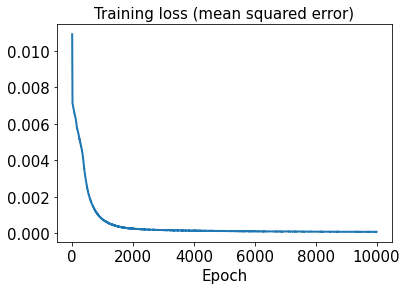

In [35]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

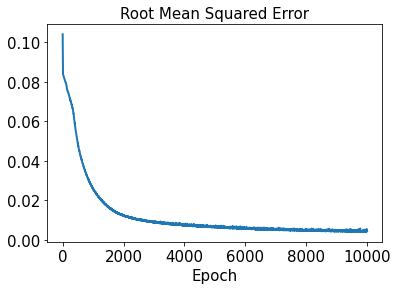

In [36]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [37]:
test_results = sd.evaluate(tsr_theta_train)

13/13 [==============================] - 0s 1ms/step - loss: 4.9926e-05 - rmse: 0.0000e+00


In [38]:
decoded_train = sd.predict(tsr_theta_train)

In [39]:
decoded_test = sd.predict(tsr_theta_test)

In [40]:
error_train_abs = np.abs(decoded_train - y_train)

In [41]:
error_test_abs = np.abs(decoded_test - y_test)

In [42]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0017389676


In [43]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.010743254


In [44]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0021479875, 0.0017016691, 0.0006546253, 0.0016503236, 0.0037787359, 0.00051199034, 0.0012550913, 0.0016498993, 0.0013219948, 0.002586174, 0.0027797555, 0.0013989445, 0.0017355394, 0.0053126216, 0.0045363116, 0.0007029436, 0.0019750763, 0.0011895953, 0.0012369356, 0.0019814956, 0.001432845, 0.0021565263, 0.0019474291, 0.0024334781, 0.0011129673, 0.0014363474, 0.0025587298, 0.0010832861, 0.0011708108, 0.0013790242, 0.0018288586, 0.0020469548, 0.0016335701, 0.0009667064, 0.0017144775, 0.0013454157, 0.0009332856, 0.0013815374, 0.0015145704, 0.004100142, 0.0027908962, 0.0013142761, 0.001666555, 0.0039326767, 0.0009512746, 0.000990605, 0.0021704154, 0.0013157318, 0.0019768104, 0.00061762217, 0.0010980715, 0.0009018476, 0.0012178269, 0.0011824546, 0.0025514185, 0.0013417389, 0.001528018, 0.0012031017, 0.0019759678, 0.0006836388, 0.001188182, 0.0016203116, 0.0017061852, 0.0019739836, 0.0011871078, 0.0017771644, 0.0010405068, 0.0023989067, 0.000897953, 0.00083313376, 0.0045338427, 0.00148994

In [45]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.045311432, 0.005079395, 0.0022562712, 0.0017827533, 0.002213677, 0.0286004, 0.032533173, 0.003503189, 0.0029906624, 0.002157783, 0.0775613, 0.016666714, 0.0024767928, 0.0029161351, 0.001862364, 0.0075370087, 0.00310867, 0.0026951076, 0.10016331, 0.0020389776, 0.0018781465, 0.0012549162, 0.002913345, 0.0024782983, 0.0016501312, 0.005509465, 0.0056504044, 0.007610029, 0.0017726456, 0.0034185415, 0.0038372763, 0.0061415634, 0.0015478719, 0.0012693241, 0.0037367898, 0.036719255, 0.0032217363, 0.001963588, 0.0040446767, 0.0029670894, 0.002923531, 0.004855658, 0.0018246364, 0.0058011212]


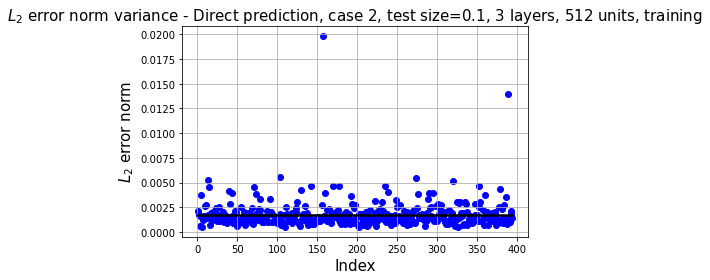

In [52]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 3 layers, 512 units, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

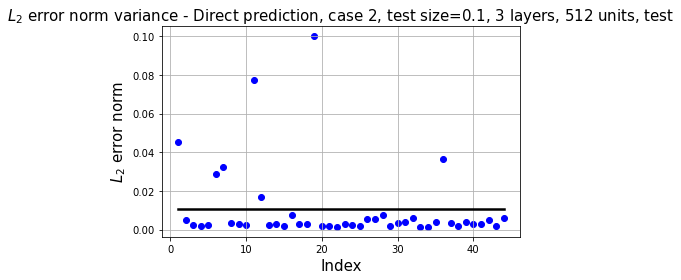

In [53]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 3 layers, 512 units, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

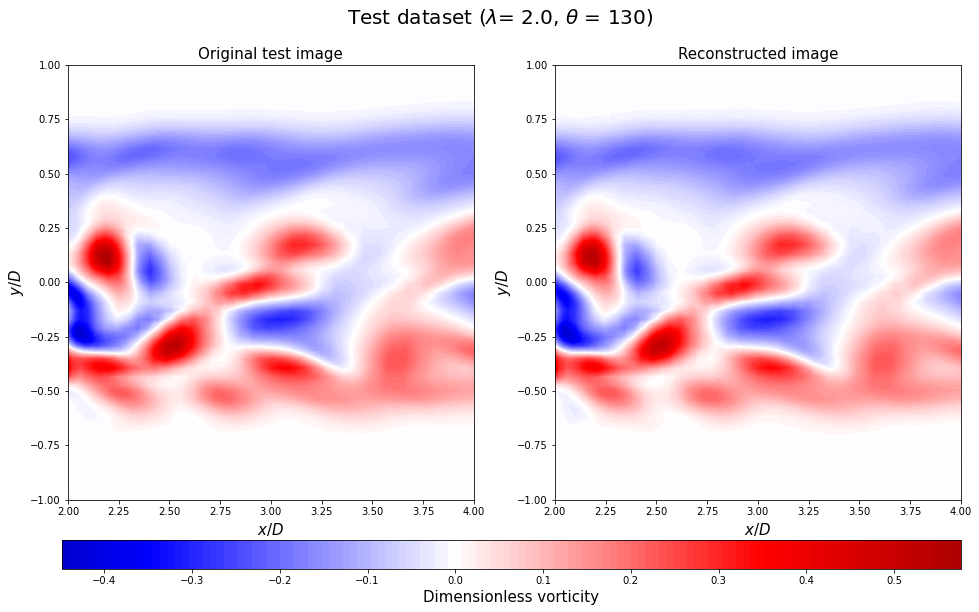

In [48]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

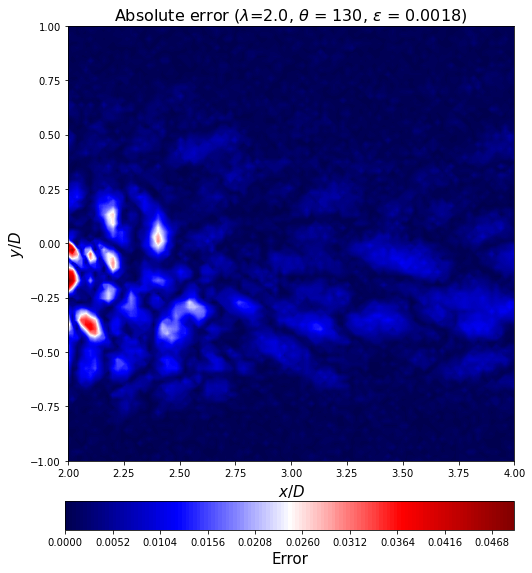

In [49]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()